In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

Unión de Dataframes

In [8]:
#'''
# Load the DataFrame from the HDF5 file
Train_Air = pd.read_hdf('C:/Users/MARIA PAULA/Downloads/EAFIT/Proyecto de Grado/Air Quality/Train/Train_set_1A.h5', key='df')
Train_Mob = pd.read_hdf('C:/Users/MARIA PAULA/Downloads/EAFIT/Proyecto de Grado/Mobilidad/Train/Mobilidad_1A.h5 ', key='df')

Train_Air = Train_Air.reset_index()

# Cambiar el nombre de la columna
Train_Air.rename(columns={'comuna': 'codigo comuna',
                 'Fecha_Hora':'Fecha Trafico'}, inplace=True)

Train_Mob.reset_index()

# Realizar un inner join entre los dos DataFrames
#df_joined = pd.merge(Train_Mob, Train_Air, on=['Fecha Trafico', 'codigo comuna'], how='left')
#'''


,index,Hora,dia-num,mes-num,año,Velocidad (Km/h),Intensidad,Nº vehiculos long 1,Nº vehiculos long 2,Nº vehiculos long 3,Ocupación,Longitud,Latitud,codigo comuna,operacion_enc,corredor_enc,sentido_enc,Fecha Trafico
0,0,0.0,5.0,1.0,2021.0,17.0,9.0,9.0,0.0,0.0,0.0,835395.4375,1183018.500,10.0,0.0,0.0,1.0,2021-01-01 00:00:00
1,1,1.0,5.0,1.0,2021.0,19.0,11.0,11.0,0.0,0.0,1.0,835395.4375,1183018.500,10.0,0.0,0.0,1.0,2021-01-01 01:00:00
2,2,2.0,5.0,1.0,2021.0,20.0,15.0,15.0,0.0,0.0,0.0,835395.4375,1183018.500,10.0,0.0,0.0,1.0,2021-01-01 02:00:00
3,3,3.0,5.0,1.0,2021.0,18.0,16.0,16.0,0.0,0.0,0.0,835395.4375,1183018.500,10.0,0.0,0.0,1.0,2021-01-01 03:00:00
4,4,4.0,5.0,1.0,2021.0,20.0,22.0,22.0,0.0,0.0,2.0,835395.4375,1183018.500,10.0,0.0,0.0,1.0,2021-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77622,77622,19.0,5.0,9.0,2022.0,5.0,72.0,12.0,0.0,0.0,65.0,835578.7950,1187109.438,4.0,1.0,2.0,1.0,2022-09-30 19:00:00
77623,77623,20.0,5.0,9.0,2022.0,12.0,89.0,23.0,0.0,0.0,80.0,835578.7950,1187109.438,4.0,1.0,2.0,1.0,2022-09-30 20:00:00
77624,77624,21.0,5.0,9.0,2022.0,11.0,71.0,18.0,0.0,0.0,70.0,835578.7950,1187109.438,4.0,1.0,2.0,1.0,2022-09-30 21:00:00
77625,77625,22.0,5.0,9.0,2022.0,5.0,56.0,22.0,0.0,0.0,55.0,835578.7950,1187109.438,4.0,1.0,2.0,1.0,2022-09-30 22:00:00


In [9]:
# Verificar si las combinaciones de 'Fecha Trafico' y 'codigo comuna' son únicas en Train_Mob
print(Train_Mob.duplicated(subset=['Fecha Trafico', 'codigo comuna']).sum())

# Verificar si las combinaciones de 'Fecha Trafico' y 'codigo comuna' son únicas en Train_Air
print(Train_Air.duplicated(subset=['Fecha Trafico', 'codigo comuna']).sum())


0
0


In [10]:
# Crear un DataFrame con combinaciones únicas de fechas y comunas en Train_Mob
combinaciones_mob = Train_Mob[['Fecha Trafico', 'codigo comuna']].drop_duplicates()

# Crear un DataFrame con combinaciones únicas de fechas y comunas en Train_Air
combinaciones_air = Train_Air[['Fecha Trafico', 'codigo comuna']].drop_duplicates()

# Contar las combinaciones en Train_Mob
conteo_mob = combinaciones_mob.groupby('codigo comuna').size()

# Contar las combinaciones en Train_Air
conteo_air = combinaciones_air.groupby('codigo comuna').size()

# Crear un DataFrame para comparar
comparacion = pd.DataFrame({'Mob': conteo_mob, 'Air': conteo_air}).fillna(0)

# Verificar diferencias
diferencias = comparacion[comparacion['Mob'] != comparacion['Air']]

if not diferencias.empty:
    print("Diferencias encontradas:\n", diferencias)
else:
    print("Las fechas se repiten para cada comuna en ambos DataFrames.")


Diferencias encontradas:
                  Mob    Air
codigo comuna              
4.0            17165  21144
10.0           19548  21144
14.0           20801  21144
16.0           20113  21144


In [11]:
# Realizamos un left join entre los datasets
df_join = Train_Air.merge(Train_Mob, on=['Fecha Trafico', 'codigo comuna'], how='left', suffixes=('_Air', '_Mob'))

# Visualizamos el DataFrame resultante
print(df_join)


            Fecha Trafico    pm_25  codigo comuna  Hora  dia-num  mes-num  \
0     2021-01-01 00:00:00  23.7741             16   0.0      5.0      1.0   
1     2021-01-01 01:00:00  28.5095             16   1.0      5.0      1.0   
2     2021-01-01 02:00:00  27.2400             16   2.0      5.0      1.0   
3     2021-01-01 03:00:00  37.8129             16   3.0      5.0      1.0   
4     2021-01-01 04:00:00  34.1848             16   4.0      5.0      1.0   
...                   ...      ...            ...   ...      ...      ...   
84571 2023-05-31 19:00:00  21.2840              4  19.0      3.0      5.0   
84572 2023-05-31 20:00:00  17.7081              4  20.0      3.0      5.0   
84573 2023-05-31 21:00:00  15.3171              4  21.0      3.0      5.0   
84574 2023-05-31 22:00:00  14.1202              4  22.0      3.0      5.0   
84575 2023-05-31 23:00:00  12.9257              4  23.0      3.0      5.0   

          año  Velocidad (Km/h)  Intensidad  Nº vehiculos long 1  \
0      

In [12]:
conteo_comunas = df_join.groupby('codigo comuna').size()
print(conteo_comunas)

codigo comuna
4     21144
10    21144
14    21144
16    21144
dtype: int64


In [13]:
#df_joined = pd.read_csv('C:/Users/MARIA PAULA/Downloads/EAFIT/Proyecto de Grado/Programacion/Train_Dataset_joined.csv')
df_joined = df_join.copy()
df_joined.to_csv('C:/Users/MARIA PAULA/Downloads/EAFIT/Proyecto de Grado/Programacion/Train_Dataset_joined.csv', mode='w')

In [14]:
df_joined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84576 entries, 0 to 84575
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Fecha Trafico        84576 non-null  datetime64[ns]
 1   pm_25                84576 non-null  float64       
 2   codigo comuna        84576 non-null  int64         
 3   Hora                 77627 non-null  float64       
 4   dia-num              77627 non-null  float64       
 5   mes-num              77627 non-null  float64       
 6   año                  77627 non-null  float64       
 7   Velocidad (Km/h)     77627 non-null  float64       
 8   Intensidad           77627 non-null  float64       
 9   Nº vehiculos long 1  77627 non-null  float64       
 10  Nº vehiculos long 2  77627 non-null  float64       
 11  Nº vehiculos long 3  77627 non-null  float64       
 12  Ocupación            77627 non-null  float64       
 13  Longitud             77627 non-

In [15]:
def missing_values(df):
    Column_Names = df.columns

    Total_rows = df.shape[0]

    missing_values = df.isnull().sum()

    Percent_missing = (missing_values / Total_rows)*100
    
    result = pd.DataFrame({
        'Column_Name': Column_Names,
        'Missing_Values': missing_values.values,
        'Total_Rows': Total_rows,
        'Percent_Missing': Percent_missing.values
    })

    return result

In [18]:
missing_values(df_joined)

,Column_Name,Missing_Values,Total_Rows,Percent_Missing
0,Fecha Trafico,0,84576,0.000000
1,pm_25,0,84576,0.000000
2,codigo comuna,0,84576,0.000000
3,Velocidad (Km/h),6949,84576,8.216279
4,Intensidad,6949,84576,8.216279
5,Nº vehiculos long 1,6949,84576,8.216279
6,Nº vehiculos long 2,6949,84576,8.216279
7,Nº vehiculos long 3,6949,84576,8.216279
8,operacion_enc,6949,84576,8.216279
9,corredor_enc,6949,84576,8.216279


In [17]:
#df_joined = df_joined.drop(['Unnamed: 0', 'Hora', 'dia-num', 'mes-num', 'año', 'Longitud','Latitud', 'Ocupación'], axis =1)
df_joined = df_joined.drop(['Hora', 'dia-num', 'mes-num', 'año', 'Longitud','Latitud', 'Ocupación'], axis =1)

In [19]:
df_joined['Fecha Trafico']= pd.to_datetime(df_joined['Fecha Trafico'], 'coerce')

In [20]:
df_joined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84576 entries, 0 to 84575
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Fecha Trafico        84576 non-null  datetime64[ns]
 1   pm_25                84576 non-null  float64       
 2   codigo comuna        84576 non-null  int64         
 3   Velocidad (Km/h)     77627 non-null  float64       
 4   Intensidad           77627 non-null  float64       
 5   Nº vehiculos long 1  77627 non-null  float64       
 6   Nº vehiculos long 2  77627 non-null  float64       
 7   Nº vehiculos long 3  77627 non-null  float64       
 8   operacion_enc        77627 non-null  float64       
 9   corredor_enc         77627 non-null  float64       
 10  sentido_enc          77627 non-null  float64       
dtypes: datetime64[ns](1), float64(9), int64(1)
memory usage: 7.1 MB


Como existen combinaciones unicas entre codigo comuna, corredor y sentido pues desde el principio se selecciono un solo carril con su sentido para cada comuna se procede a llenar los datos nulos de sentido y corredor de forma que muestre la misma info por comuna

In [22]:
# DataFrame con las combinaciones únicas conocidas
df_filtrado = df_joined.copy()
combinaciones_unicas = pd.DataFrame({
    'codigo comuna': [10.0, 16.0, 14.0, 4.0],
    'corredor_enc': [0, 1, 3, 2],
    'sentido_enc': [1, 0, 2, 1]
})

# Crear diccionarios de mapeo
corredor_map = dict(zip(combinaciones_unicas['codigo comuna'], combinaciones_unicas['corredor_enc']))
sentido_map = dict(zip(combinaciones_unicas['codigo comuna'], combinaciones_unicas['sentido_enc']))

# Llenar los datos nulos en el DataFrame original
df_filtrado['corredor_enc'] = df_filtrado['corredor_enc'].fillna(df_filtrado['codigo comuna'].map(corredor_map))
df_filtrado['sentido_enc'] = df_filtrado['sentido_enc'].fillna(df_filtrado['codigo comuna'].map(sentido_map))

# Mostrar el DataFrame resultante
missing_values(df_filtrado)

,Column_Name,Missing_Values,Total_Rows,Percent_Missing
0,Fecha Trafico,0,84576,0.000000
1,pm_25,0,84576,0.000000
2,codigo comuna,0,84576,0.000000
3,Velocidad (Km/h),6949,84576,8.216279
4,Intensidad,6949,84576,8.216279
5,Nº vehiculos long 1,6949,84576,8.216279
6,Nº vehiculos long 2,6949,84576,8.216279
7,Nº vehiculos long 3,6949,84576,8.216279
8,operacion_enc,6949,84576,8.216279
9,corredor_enc,0,84576,0.000000


In [27]:
df_filtrado.describe().T

,count,mean,min,25%,50%,75%,max,std
Fecha Trafico,84576,2022-03-17 11:30:00,2021-01-01 00:00:00,2021-08-09 05:45:00,2022-03-17 11:30:00,2022-10-23 17:15:00,2023-05-31 23:00:00,NaN
pm_25,84576.0,17.581429,0.0,11.0008,16.1412,22.4646,110.534,9.306402
codigo comuna,84576.0,11.0,4.0,8.5,12.0,14.5,16.0,4.582603
Velocidad (Km/h),77627.0,17.430168,1.0,10.0,13.0,20.0,140.0,13.646402
Intensidad,77627.0,166.857556,0.0,66.0,141.0,223.0,1158.0,128.59927
Nº vehiculos long 1,77627.0,117.365041,-49.682964,34.0,99.0,177.0,717.0,96.377253
Nº vehiculos long 2,77627.0,23.396561,0.0,2.0,13.0,29.0,248.0,29.709655
Nº vehiculos long 3,77627.0,10.11186,-3.007428,0.0,4.0,10.0,307.0,17.378704
operacion_enc,77627.0,0.399513,0.0,0.0,0.0,1.0,1.0,0.489801
corredor_enc,84576.0,1.5,0.0,0.75,1.5,2.25,3.0,1.118041


In [25]:
df_joined = df_filtrado.copy()

In [28]:
# Especifica las columnas en las que deseas reemplazar los valores negativos
columnas_a_ajustar = ['Nº vehiculos long 1', 
                       'Nº vehiculos long 3'
                       ]

# Reemplazar valores negativos con 0
df_joined[columnas_a_ajustar] = df_joined[columnas_a_ajustar].clip(lower=0)


In [29]:
df_joined.describe().T

,count,mean,min,25%,50%,75%,max,std
Fecha Trafico,84576,2022-03-17 11:30:00,2021-01-01 00:00:00,2021-08-09 05:45:00,2022-03-17 11:30:00,2022-10-23 17:15:00,2023-05-31 23:00:00,NaN
pm_25,84576.0,17.581429,0.0,11.0008,16.1412,22.4646,110.534,9.306402
codigo comuna,84576.0,11.0,4.0,8.5,12.0,14.5,16.0,4.582603
Velocidad (Km/h),77627.0,17.430168,1.0,10.0,13.0,20.0,140.0,13.646402
Intensidad,77627.0,166.857556,0.0,66.0,141.0,223.0,1158.0,128.59927
Nº vehiculos long 1,77627.0,117.596374,0.0,34.0,99.0,177.0,717.0,96.04997
Nº vehiculos long 2,77627.0,23.396561,0.0,2.0,13.0,29.0,248.0,29.709655
Nº vehiculos long 3,77627.0,10.111938,0.0,0.0,4.0,10.0,307.0,17.378654
operacion_enc,77627.0,0.399513,0.0,0.0,0.0,1.0,1.0,0.489801
corredor_enc,84576.0,1.5,0.0,0.75,1.5,2.25,3.0,1.118041


Imputo los datos faltantes con sklearn imputer el modulo IterativeImputer con un modelo de regresion lineal 

In [30]:
# Supongamos que tu DataFrame se llama df
# Primero, asegúrate de que las columnas con datos faltantes sean numéricas
# Seleccionamos las columnas numéricas, excluyendo 'Fecha Trafico' y 'codigo comuna'
columnas_numericas = df_joined.columns.difference(['Fecha Trafico'])

# Aplicar el imputador
imputer = IterativeImputer(estimator=LinearRegression(), max_iter=10, random_state=42)

# Imputar los valores faltantes en las columnas seleccionadas
df_joined[columnas_numericas] = imputer.fit_transform(df_joined[columnas_numericas])

# Convertir la columna 'operacion_enc' a tipo entero para mantenerla binaria
df_joined['operacion_enc'] = df_joined['operacion_enc'].round().astype(int)

c:\Users\MARIA PAULA\Downloads\EAFIT\Proyecto de Grado\Programacion\.venv\Lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [31]:
df_joined.describe().T

,count,mean,min,25%,50%,75%,max,std
Fecha Trafico,84576,2022-03-17 11:30:00,2021-01-01 00:00:00,2021-08-09 05:45:00,2022-03-17 11:30:00,2022-10-23 17:15:00,2023-05-31 23:00:00,NaN
pm_25,84576.0,17.581429,0.0,11.0008,16.1412,22.4646,110.534,9.306402
codigo comuna,84576.0,11.0,4.0,8.5,12.0,14.5,16.0,4.582603
Velocidad (Km/h),84576.0,17.237254,1.0,11.0,13.0,19.0,140.0,13.124782
Intensidad,84576.0,166.990485,0.0,72.0,151.0,211.0,1158.0,123.250575
Nº vehiculos long 1,84576.0,116.649161,0.0,38.0,97.0,171.0,717.0,92.160578
Nº vehiculos long 2,84576.0,23.263067,0.0,3.0,15.0,27.0,248.0,28.492085
Nº vehiculos long 3,84576.0,9.940909,0.0,0.0,4.0,9.741176,307.0,16.701441
operacion_enc,84576.0,0.41779,0.0,0.0,0.0,1.0,1.0,0.493198
corredor_enc,84576.0,1.5,0.0,0.75,1.5,2.25,3.0,1.118041


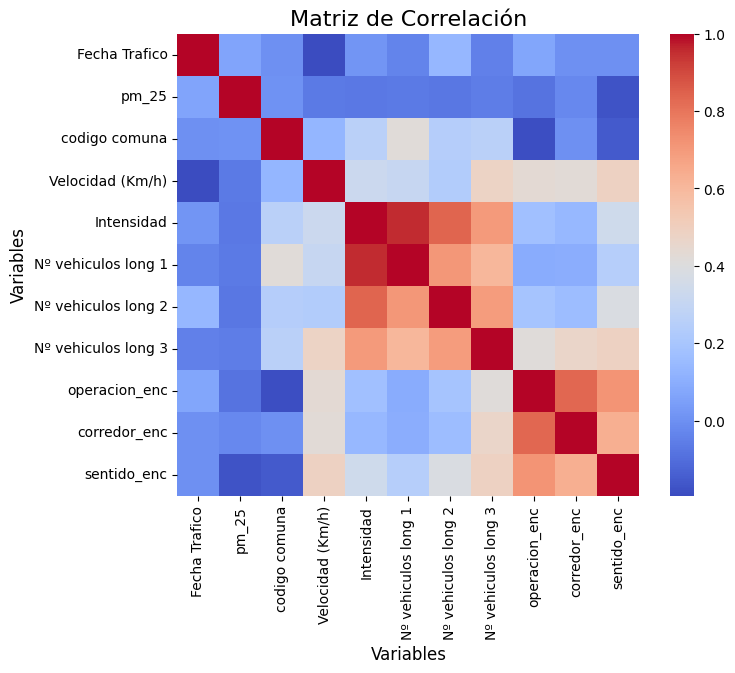

In [35]:
# Calcular la matriz de correlación
correlation_matrix = df_joined.corr()

# Configurar el tamaño de la figura
plt.figure(figsize=(8, 6))

# Crear un mapa de calor (heatmap) de la matriz de correlación
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', square=True, cbar=True)

# Títulos y etiquetas
plt.title('Matriz de Correlación', fontsize=16)
plt.xlabel('Variables', fontsize=12)
plt.ylabel('Variables', fontsize=12)

# Mostrar la visualización
plt.show()

In [36]:
duplicados = df_joined[df_joined.duplicated(subset=['Fecha Trafico','codigo comuna', 'corredor_enc', 'sentido_enc'], keep=False)]


conteo_duplicados = df_joined.duplicated(subset=['Fecha Trafico','codigo comuna', 'corredor_enc', 'sentido_enc']).sum()
conteo_duplicados 

np.int64(0)

In [37]:
df_joined.to_csv('C:/Users/MARIA PAULA/Downloads/EAFIT/Proyecto de Grado/Programacion/Unificado.csv', mode='w')